In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [119]:
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 20)

In [120]:
df=pd.read_csv("heart-disease.csv")

# Êxploratory Data Analysis

In [122]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [121]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [49]:
df.shape

(303, 14)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [51]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

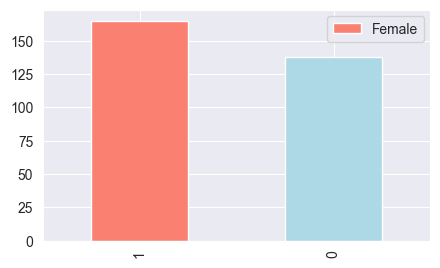

In [52]:
df.target.value_counts().plot(kind="bar", figsize=(5,3), color=["salmon","lightblue"])
plt.legend(["Female","Male"]);

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


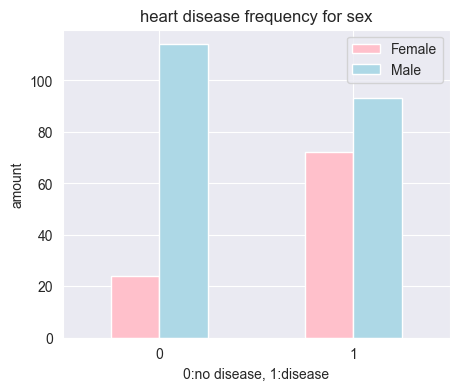

In [54]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["pink","lightblue"], figsize=(5,4))
plt.title("heart disease frequency for sex")
plt.xlabel("0:no disease, 1:disease")
plt.ylabel("amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show()

# Modelling

In [55]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
X=df.drop("target",1)
y=df.target

In [57]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=1)

## Trying some base models

In [58]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "SVM": SVC(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
         "XGBoost": XGBClassifier(),}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        print(f"{name}")
        print(f"train score: {round(model.score(X_train, y_train),2)}")
        print(f"test score: {round(model.score(X_test, y_test),2)}")
        print("----------------------")
        


In [59]:
fit_and_score(models, X_train, X_test, y_train, y_test)

Logistic Regression
train score: 0.87
test score: 0.77
----------------------
KNN
train score: 0.78
test score: 0.57
----------------------
SVM
train score: 0.68
test score: 0.56
----------------------
Decision Tree
train score: 1.0
test score: 0.69
----------------------
Random Forest
train score: 1.0
test score: 0.75
----------------------
XGBoost
train score: 1.0
test score: 0.79
----------------------


# Logistic Regression

### Scaling the data after train test split

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [61]:
log=LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [62]:
y_pred=log.predict(X_test)
y_prob=log.predict_proba(X_test)[:,1]

In [63]:
y_prob

array([0.00494818, 0.74417502, 0.07190648, 0.00557767, 0.02982689,
       0.00291943, 0.01070033, 0.70872091, 0.00274673, 0.99353369,
       0.30500113, 0.07170917, 0.85411281, 0.22558385, 0.2866292 ,
       0.9573745 , 0.99166155, 0.01361053, 0.48202557, 0.78189409,
       0.98941541, 0.01888011, 0.77211927, 0.98780654, 0.98853088,
       0.77587116, 0.00338035, 0.98543708, 0.91589962, 0.99508403,
       0.95969086, 0.86495562, 0.78374192, 0.83268162, 0.03890277,
       0.39773518, 0.07973352, 0.26947738, 0.7095639 , 0.05077097,
       0.96682232, 0.04032219, 0.18440091, 0.00265453, 0.78866215,
       0.90774925, 0.36946881, 0.80654262, 0.72305469, 0.96234112,
       0.9604018 , 0.78189181, 0.91234429, 0.76387898, 0.99542613,
       0.98994816, 0.76706444, 0.01739234, 0.7321811 , 0.01867125,
       0.52054812])

In [64]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [65]:
np.array(y_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [66]:
print(f"train score: {round(log.score(X_train, y_train),2)}")
print(f"test score: {round(log.score(X_test, y_test),2)}")

train score: 0.87
test score: 0.74


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



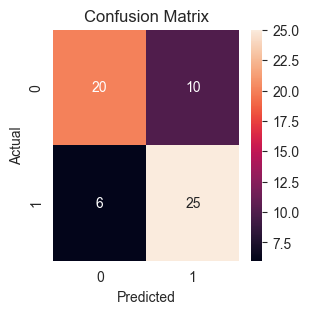

In [68]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='d', annot=True )
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

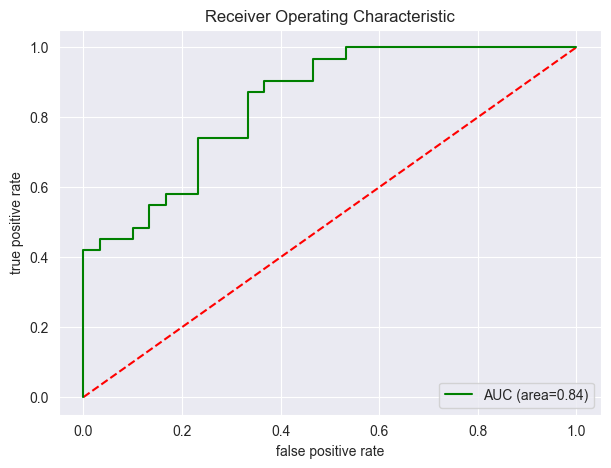

In [69]:
false_pos, true_pos, treshold= roc_curve(y_test, y_prob)
plt.figure(figsize=(7,5))
plt.plot([0,1],[0,1],"r--")
plt.plot(false_pos,true_pos, label= "AUC (area=%0.2f)" % roc_auc_score(y_test, y_prob), color="g")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

## tuning the log model

In [70]:
testscore=[]
trainscore=[]
for i in [0.01, 0.1,0.2, 0.5, 1.0, 1.5, 2.0]:
    log=LogisticRegression(C=i).fit(X_train, y_train)
    testscore.append(log.score(X_test, y_test))
    trainscore.append(log.score(X_train, y_train))
pd.DataFrame({"train": trainscore, "test": testscore}, index=[0.01, 0.1, 0.2,0.5, 1.0, 1.5, 2.0])

,train,test
0.01,0.834711,0.786885
0.10,0.859504,0.754098
0.20,0.876033,0.754098
0.50,0.871901,0.754098
1.00,0.867769,0.737705
1.50,0.871901,0.737705
2.00,0.871901,0.737705


## Remodeling log

In [71]:
log2=LogisticRegression(C=0.01)
log2.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [72]:
y_pred2=log2.predict(X_test)
y_prob2=log2.predict_proba(X_test)[:,1]

In [73]:
print(f"train score: {round(log2.score(X_train, y_train),2)}")
print(f"test score: {round(log2.score(X_test, y_test),2)}")

train score: 0.83
test score: 0.79


In [74]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.74      0.90      0.81        31

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



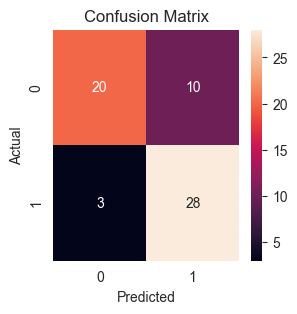

In [75]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred2), fmt='d', annot=True )
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [76]:
log2.coef_[0]

array([-0.09161356, -0.20152074,  0.27987889, -0.07334256, -0.04645724,
        0.00890524,  0.08224362,  0.2121436 , -0.23217142, -0.20454124,
        0.13367627, -0.2071073 , -0.13060254])

In [77]:
features=dict(zip(df.columns,list(log2.coef_[0])))
features

{'age': -0.09161356428398416,
 'sex': -0.20152073868353118,
 'cp': 0.27987888959071733,
 'trestbps': -0.0733425576970246,
 'chol': -0.046457244373116324,
 'fbs': 0.008905238942839106,
 'restecg': 0.08224362358457141,
 'thalach': 0.21214359816850326,
 'exang': -0.23217141818967507,
 'oldpeak': -0.20454124248112696,
 'slope': 0.13367626953553532,
 'ca': -0.20710729629892222,
 'thal': -0.130602541072472}

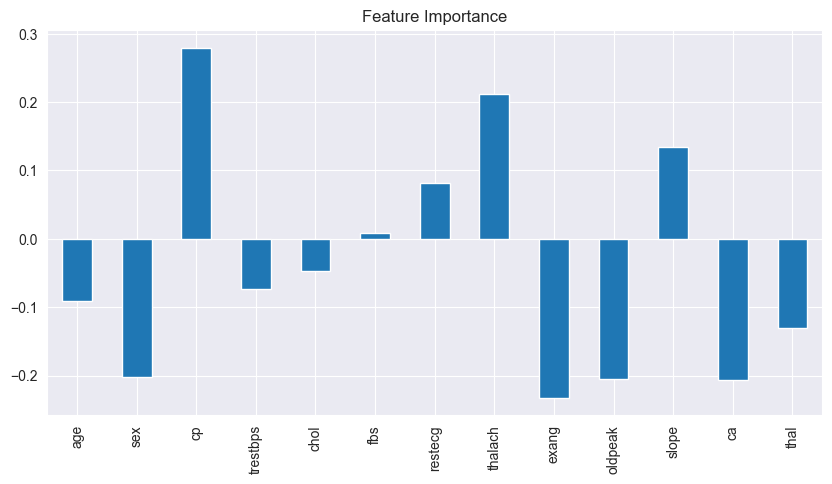

In [78]:
sns.set_style("darkgrid")
feature_df = pd.DataFrame(features, index=[0])
feature_df.T.plot(kind="bar",title="Feature Importance", legend=False, figsize=(10,5));

## Using cross validation on the data and comparing the models performances

In [79]:
precision=cross_val_score(log,X,y,cv=5,scoring="precision").mean()
accuracy=cross_val_score(log,X,y,cv=5,scoring="accuracy").mean()
recall=cross_val_score(log,X,y,cv=5,scoring="recall").mean()
f1=cross_val_score(log,X,y,cv=5,scoring="f1").mean()

In [80]:
precision2=cross_val_score(log2,X,y,cv=5,scoring="precision").mean()
accuracy2=cross_val_score(log2,X,y,cv=5,scoring="accuracy").mean()
recall2=cross_val_score(log2,X,y,cv=5,scoring="recall").mean()
f12=cross_val_score(log2,X,y,cv=5,scoring="f1").mean()

In [81]:
cv_metrics = pd.DataFrame({"Accuracy": accuracy,
                           "Precision": precision,
                           "Recall": recall,
                           "F1": f1},
                          index=["log"])

In [82]:
cv_metrics

,Accuracy,Precision,Recall,F1
log,0.824863,0.819842,0.878788,0.846641


In [83]:
cv_metrics2 = pd.DataFrame({"Accuracy": accuracy2,
                           "Precision": precision2,
                           "Recall": recall2,
                           "F1": f12},
                          index=["log2"])

In [84]:
cv_metrics2

,Accuracy,Precision,Recall,F1
log2,0.758743,0.755659,0.824242,0.787303


In [98]:
log3=LogisticRegression(C=0.2)
log3.fit(X_train, y_train)

LogisticRegression(C=0.2)

In [99]:
precision3=cross_val_score(log3,X,y,cv=5,scoring="precision").mean()
accuracy3=cross_val_score(log3,X,y,cv=5,scoring="accuracy").mean()
recall3=cross_val_score(log3,X,y,cv=5,scoring="recall").mean()
f13=cross_val_score(log3,X,y,cv=5,scoring="f1").mean()

In [100]:
cv_metrics3 = pd.DataFrame({"Accuracy": accuracy3,
                           "Precision": precision3,
                           "Recall": recall3,
                           "F1": f13},
                          index=["log3"])

In [123]:
cv_metrics3

,Accuracy,Precision,Recall,F1
log3,0.844699,0.820794,0.921212,0.867301


In [89]:
log4=LogisticRegression(C=0.3)
log4.fit(X_train, y_train)

LogisticRegression(C=0.3)

In [90]:
precision4=cross_val_score(log4,X,y,cv=5,scoring="precision").mean()
accuracy4=cross_val_score(log4,X,y,cv=5,scoring="accuracy").mean()
recall4=cross_val_score(log4,X,y,cv=5,scoring="recall").mean()
f14=cross_val_score(log4,X,y,cv=5,scoring="f1").mean()

In [91]:
cv_metrics4 = pd.DataFrame({"Accuracy": accuracy4,
                           "Precision": precision4,
                           "Recall": recall4,
                           "F1": f14},
                          index=["log4"])

In [101]:
final=pd.concat([cv_metrics,cv_metrics2,cv_metrics3,cv_metrics4])
final

,Accuracy,Precision,Recall,F1
log,0.824863,0.819842,0.878788,0.846641
log2,0.758743,0.755659,0.824242,0.787303
log3,0.844699,0.820794,0.921212,0.867301
log4,0.838087,0.819160,0.909091,0.860725


## !!! log 3 model is the best logistic regression model for this data when cross validation is used on it.